In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (only once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/9a5c0790-03b0-49dc-b837-
[nltk_data]     8cb765dde7d4/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/9a5c0790-03b0-49dc-b837-
[nltk_data]     8cb765dde7d4/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/9a5c0790-03b0-49dc-b837-
[nltk_data]     8cb765dde7d4/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
# Reload the CSV with no header and custom column names
df = pd.read_csv("twitter_training.csv", header=None)

# Manually assign correct column names
df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']

# Check first few rows
df.head()


,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
df.columns


Index(['ID', 'Topic', 'Sentiment', 'Tweet'], dtype='object')

In [12]:
# Check nulls and data types
df.info()
df.isnull().sum()

# Drop nulls if present
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
# Rename if necessary
df.rename(columns={'text': 'Tweet', 'sentiment': 'Sentiment'}, inplace=True)

# Confirm new names
df.columns


Index(['ID', 'Topic', 'Sentiment', 'Tweet'], dtype='object')

In [14]:
# Define stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@[\w]*', '', text)
    text = re.sub(r'#[\w]*', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply to the dataset
df['Clean_Text'] = df['Tweet'].apply(clean_text)

# Show results
df[['Tweet', 'Clean_Text']].head()


,Tweet,Clean_Text
0,im getting on borderlands and i will murder yo...,im getting borderland murder
1,I am coming to the borders and I will kill you...,coming border kill
2,im getting on borderlands and i will kill you ...,im getting borderland kill
3,im coming on borderlands and i will murder you...,im coming borderland murder
4,im getting on borderlands 2 and i will murder ...,im getting borderland murder


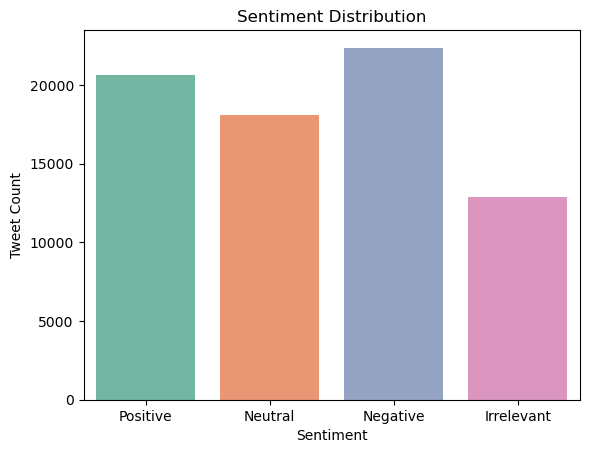

In [15]:
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


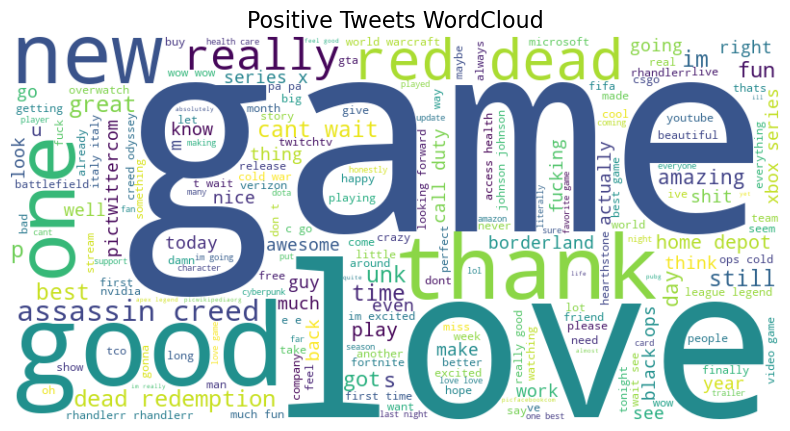

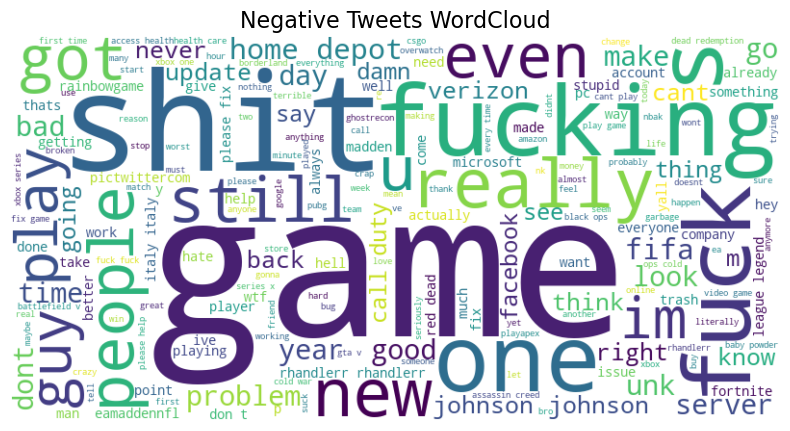

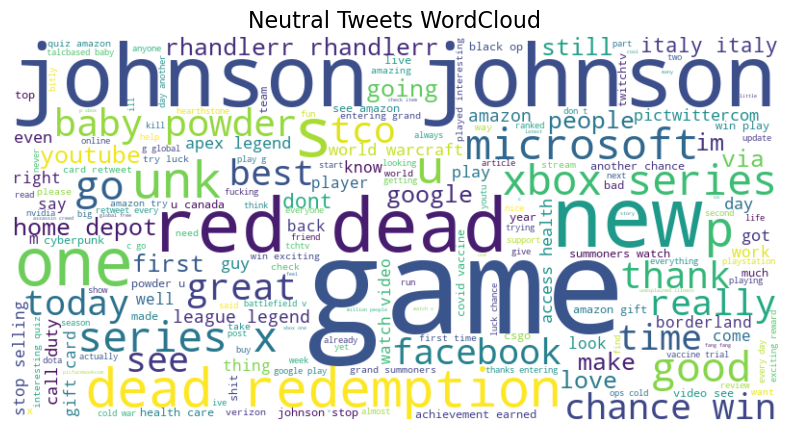

In [16]:
# Filter by sentiment
positive = df[df['Sentiment'] == 'Positive']['Clean_Text']
negative = df[df['Sentiment'] == 'Negative']['Clean_Text']
neutral = df[df['Sentiment'] == 'Neutral']['Clean_Text']

# WordCloud function
def generate_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Show word clouds
generate_wordcloud(positive, "Positive Tweets WordCloud")
generate_wordcloud(negative, "Negative Tweets WordCloud")
generate_wordcloud(neutral, "Neutral Tweets WordCloud")


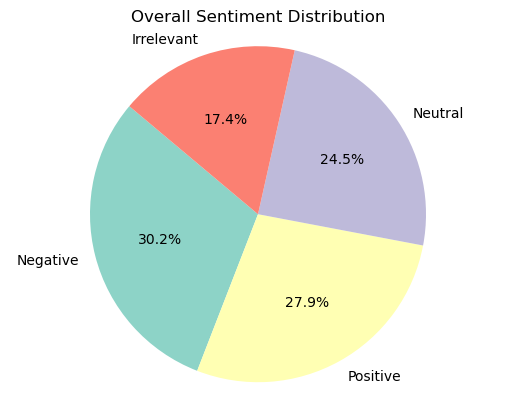

In [17]:
sentiment_counts = df['Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title("Overall Sentiment Distribution")
plt.axis('equal')
plt.show()
